# (Scrap sheet) Testing EDA graphs on COVID Data pull

COVID-daily data was aggregated data. The data being reported per state was difficult to filter and read to create a meaningful graph. (Attempts below)  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/Users/EderlynT/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [179]:
daily = pd.read_csv('../covid-daily.csv')
daily.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
3764,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3765,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3766,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3767,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3768,20200122,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,NaN,NaN,NaN,NaN,NaN


In [180]:
state = pd.read_csv('../data/cleaned_state_mandates.csv')
state.head()

,state,easing_soc_dist,stay_home_ord,traveler_quarant,business_clos,gathering_ban,school_clos,rest_lims,primaries,emergency_date,emergency,order_date,shelter_in_place,state_abbr
0,Alabama,1,Lifted,No information,Some Non-Essential Businesses Permitted to Reo...,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-13,Yes,2020-03-13,1.0,AL
1,Alaska,1,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reop...,Expanded to 50+ People Prohibited,Closed for School Year,Reopened to Dine-in Service with Capacity Limits,Remote,2020-03-11,Yes,2020-03-11,1.0,AK
2,Arizona,1,Statewide,From Certain States,Some Non-Essential Businesses Permitted to Reo...,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11,1.0,AZ
3,Arkansas,1,No,No information,Some Non-Essential Businesses Permitted to Reo...,>10 People Prohibited,Closed for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-11,Yes,2020-03-11,0.0,AR
4,California,1,Statewide,No information,Some Non-Essential Businesses Permitted to Reo...,All Gatherings Prohibited,Recommended Closure for School Year,Closed Except for Takeout/Delivery,Unchanged,2020-03-04,Yes,2020-03-04,1.0,CA


In [5]:
daily.isnull().sum()

date                           0
state                          0
positive                      15
negative                     187
pending                     3045
hospitalizedCurrently       2249
hospitalizedCumulative      2269
inIcuCurrently              2990
inIcuCumulative             3456
onVentilatorCurrently       3142
onVentilatorCumulative      3667
recovered                   2403
dataQualityGrade            2820
lastUpdateEt                 373
hash                           0
dateChecked                    0
death                        726
hospitalized                2269
total                          0
totalTestResults               0
posNeg                         0
fips                           0
deathIncrease                 56
hospitalizedIncrease          56
negativeIncrease              56
positiveIncrease              56
totalTestResultsIncrease      56
dtype: int64

In [181]:
daily = daily.dropna(subset=['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease'])


In [182]:
daily.isnull().sum()

date                           0
state                          0
positive                      14
negative                     164
pending                     3011
hospitalizedCurrently       2193
hospitalizedCumulative      2213
inIcuCurrently              2934
inIcuCumulative             3400
onVentilatorCurrently       3086
onVentilatorCumulative      3611
recovered                   2347
dataQualityGrade            2764
lastUpdateEt                 323
hash                           0
dateChecked                    0
death                        671
hospitalized                2213
total                          0
totalTestResults               0
posNeg                         0
fips                           0
deathIncrease                  0
hospitalizedIncrease           0
negativeIncrease               0
positiveIncrease               0
totalTestResultsIncrease       0
dtype: int64

In [117]:
daily.shape

(3713, 27)

In [8]:
daily.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,3.713000e+03,3699.000000,3549.000000,702.000000,1520.000000,1500.000000,779.000000,313.000000,627.000000,102.000000,...,1500.000000,3.713000e+03,3.713000e+03,3.713000e+03,3713.000000,3713.000000,3713.000000,3713.000000,3713.000000,3713.000000
mean,2.020039e+07,9183.234928,46374.805861,1416.243590,1388.394737,2482.258000,611.546855,369.051118,319.942584,106.598039,...,2482.258000,5.374284e+04,5.347508e+04,5.347508e+04,32.292755,20.228117,40.994883,2168.085914,360.974414,2526.552114
std,6.972279e+01,29476.630652,90972.178797,7240.557601,2670.929690,8999.758521,954.991384,352.876055,428.955917,67.344285,...,8999.758521,1.130587e+05,1.129733e+05,1.129733e+05,18.546182,67.173624,249.707475,5192.979773,935.433820,5681.638602
min,2.020012e+07,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,6.000000,0.000000,2.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-201.000000,-181.000000,-5174.000000,-383.000000,-9269.000000
25%,2.020032e+07,88.000000,1378.000000,10.000000,86.000000,101.750000,91.500000,86.000000,28.500000,57.000000,...,101.750000,9.950000e+02,9.140000e+02,9.140000e+02,17.000000,0.000000,0.000000,25.000000,7.000000,62.000000
50%,2.020041e+07,1101.000000,14957.000000,52.000000,371.000000,427.500000,166.000000,260.000000,137.000000,95.000000,...,427.500000,1.482400e+04,1.479400e+04,1.479400e+04,32.000000,2.000000,0.000000,598.000000,72.000000,698.000000
75%,2.020042e+07,6080.000000,51075.000000,370.750000,1514.250000,1265.250000,876.500000,514.000000,497.000000,136.250000,...,1265.250000,5.659700e+04,5.576400e+04,5.576400e+04,46.000000,11.000000,7.000000,2351.000000,310.000000,2730.000000
max,2.020051e+07,337055.000000,923958.000000,64400.000000,18825.000000,73143.000000,5225.000000,1414.000000,2425.000000,276.000000,...,73143.000000,1.204651e+06,1.204651e+06,1.204651e+06,78.000000,951.000000,7758.000000,163092.000000,11571.000000,165227.000000


In [9]:
daily.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [10]:
daily.corr()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,1.000000,0.258101,0.442977,0.011677,-0.006755,0.133903,-0.107017,0.442391,0.008566,0.387069,...,0.133903,0.416399,0.417407,0.417407,-0.003994,0.175620,0.074877,0.277710,0.160620,0.279550
positive,0.258101,1.000000,0.738830,0.054658,0.838429,0.993223,0.865444,0.923541,0.787394,0.866808,...,0.993223,0.845846,0.846390,0.846390,-0.042312,0.781434,0.453801,0.517886,0.719575,0.591956
negative,0.442977,0.738830,1.000000,0.083019,0.593224,0.822194,0.555818,0.859684,0.588003,0.620343,...,0.822194,0.984049,0.984380,0.984380,-0.081292,0.497083,0.263306,0.707713,0.501407,0.730256
pending,0.011677,0.054658,0.083019,1.000000,0.133868,0.642748,0.141527,-0.394307,0.286631,NaN,...,0.642748,0.165888,0.083064,0.083064,-0.225767,0.093609,-0.017775,0.122590,0.313405,0.143489
hospitalizedCurrently,-0.006755,0.838429,0.593224,0.133868,1.000000,0.843392,0.987155,0.860492,0.959535,0.345277,...,0.843392,0.697262,0.696359,0.696359,-0.050930,0.908104,0.561603,0.444011,0.913722,0.564545
hospitalizedCumulative,0.133903,0.993223,0.822194,0.642748,0.843392,1.000000,0.893668,0.966958,0.974091,0.962132,...,1.000000,0.901360,0.901664,0.901664,0.027436,0.786340,0.502712,0.720870,0.694317,0.770379
inIcuCurrently,-0.107017,0.865444,0.555818,0.141527,0.987155,0.893668,1.000000,0.907040,0.985494,0.966003,...,0.893668,0.685159,0.683491,0.683491,-0.165050,0.911938,0.625614,0.400982,0.904450,0.525735
inIcuCumulative,0.442391,0.923541,0.859684,-0.394307,0.860492,0.966958,0.907040,1.000000,0.887402,0.973261,...,0.966958,0.878472,0.878587,0.878587,0.069509,0.668945,0.187614,0.563673,0.723233,0.599211
onVentilatorCurrently,0.008566,0.787394,0.588003,0.286631,0.959535,0.974091,0.985494,0.887402,1.000000,-0.555530,...,0.974091,0.667056,0.666994,0.666994,-0.010087,0.768147,0.050369,0.391114,0.867234,0.485323
onVentilatorCumulative,0.387069,0.866808,0.620343,NaN,0.345277,0.962132,0.966003,0.973261,-0.555530,1.000000,...,0.962132,0.645398,0.645398,0.645398,-0.273895,0.659243,0.067876,0.355419,0.536587,0.375550


In [11]:
daily.dtypes

date                          int64
state                        object
positive                    float64
negative                    float64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
recovered                   float64
dataQualityGrade             object
lastUpdateEt                 object
hash                         object
dateChecked                  object
death                       float64
hospitalized                float64
total                         int64
totalTestResults              int64
posNeg                        int64
fips                          int64
deathIncrease               float64
hospitalizedIncrease        float64
negativeIncrease            float64
positiveIncrease            float64
totalTestResultsIncrease    float64
dtype: object

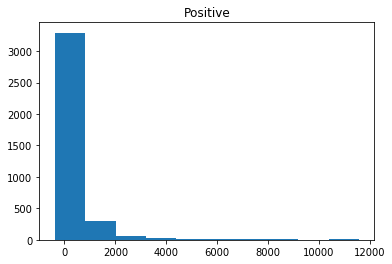

In [13]:
plt.hist(daily['positiveIncrease'])
plt.title('Positive');

In [24]:
# 14 states lifted the stay at home order by May 9.

# 0            Alabama
# 1             Alaska
# 9            Florida
# 12             Idaho
# 14           Indiana
# 16            Kansas
# 24       Mississippi
# 25          Missouri
# 26           Montana
# 40    South Carolina
# 42         Tennessee
# 43             Texas
# 44              Utah
# 48     West Virginia
# Name: state, dtype: object

In [66]:
daily.loc[daily['state'] == 'WV']

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
54,20200511,WV,1366.0,62103.0,NaN,49.0,NaN,10.0,NaN,6.0,...,NaN,63469,63469,63469,54,0.0,0.0,819.0,6.0,825.0
110,20200510,WV,1360.0,61284.0,NaN,49.0,NaN,10.0,NaN,6.0,...,NaN,62644,62644,62644,54,1.0,0.0,1622.0,25.0,1647.0
166,20200509,WV,1335.0,59662.0,NaN,53.0,NaN,13.0,NaN,7.0,...,NaN,60997,60997,60997,54,2.0,0.0,1536.0,25.0,1561.0
222,20200508,WV,1310.0,58126.0,NaN,65.0,NaN,19.0,NaN,11.0,...,NaN,59436,59436,59436,54,0.0,0.0,1892.0,23.0,1915.0
278,20200507,WV,1287.0,56234.0,NaN,76.0,NaN,22.0,NaN,12.0,...,NaN,57521,57521,57521,54,1.0,0.0,1698.0,39.0,1737.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,20200311,WV,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,3,54,0.0,0.0,1.0,0.0,1.0
3494,20200310,WV,0.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,2,2,54,0.0,0.0,0.0,0.0,0.0
3544,20200309,WV,0.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,2,2,54,0.0,0.0,0.0,0.0,0.0
3594,20200308,WV,0.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,2,2,54,0.0,0.0,0.0,0.0,0.0


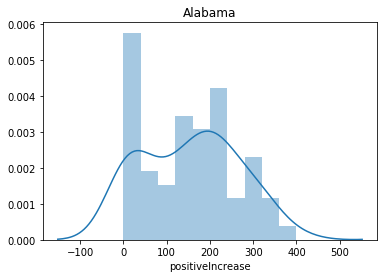

In [68]:
plt.title('Alabama')
sns.distplot(daily[daily['state'] == 'AL']['positiveIncrease'],
             bins = 10,
             kde = True)

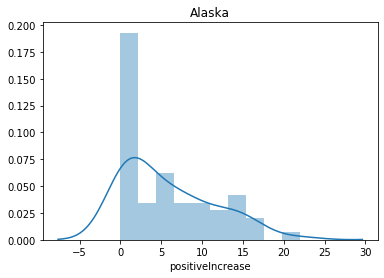

In [42]:
plt.title('Alaska')
sns.distplot(daily[daily['state'] == 'AK']['positiveIncrease'],
             bins = 10,
             kde = True)

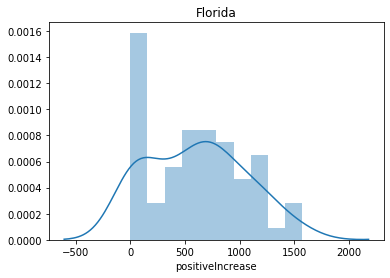

In [43]:
plt.title('Florida')
sns.distplot(daily[daily['state'] == 'FL']['positiveIncrease'],
             bins = 10,
             kde = True)

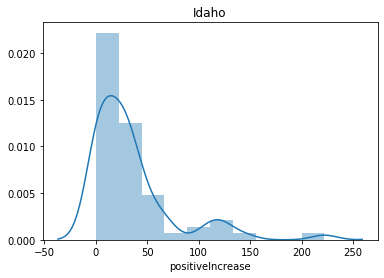

In [44]:
plt.title('Idaho')
sns.distplot(daily[daily['state'] == 'ID']['positiveIncrease'],
             bins = 10,
             kde = True)

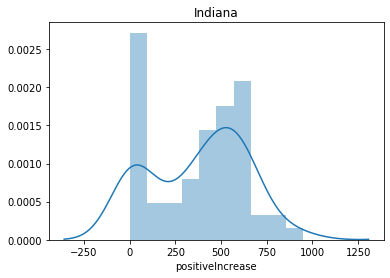

In [46]:
plt.title('Indiana')
sns.distplot(daily[daily['state'] == 'IN']['positiveIncrease'],
             bins = 10,
             kde = True)

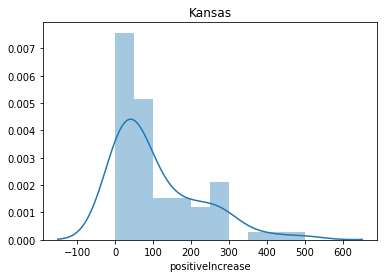

In [48]:
plt.title('Kansas')
sns.distplot(daily[daily['state'] == 'KS']['positiveIncrease'],
             bins = 10,
             kde = True)

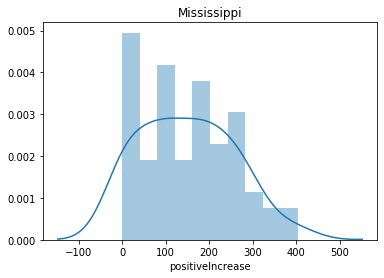

In [50]:
plt.title('Mississippi')
sns.distplot(daily[daily['state'] == 'MS']['positiveIncrease'],
             bins = 10,
             kde = True)

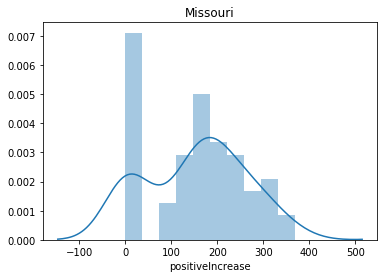

In [52]:
plt.title('Missouri')
sns.distplot(daily[daily['state'] == 'MO']['positiveIncrease'],
             bins = 10,
             kde = True)

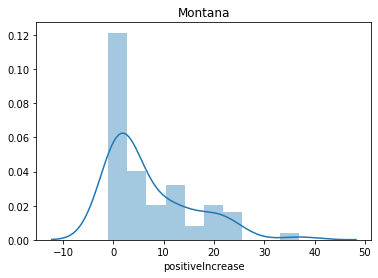

In [54]:
plt.title('Montana')
sns.distplot(daily[daily['state'] == 'MT']['positiveIncrease'],
             bins = 10,
             kde = True)

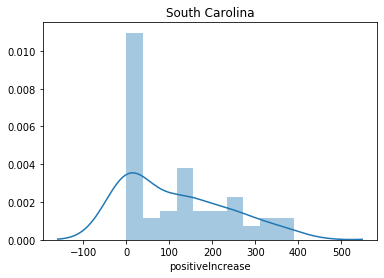

In [56]:
plt.title('South Carolina')
sns.distplot(daily[daily['state'] == 'SC']['positiveIncrease'],
             bins = 10,
             kde = True)

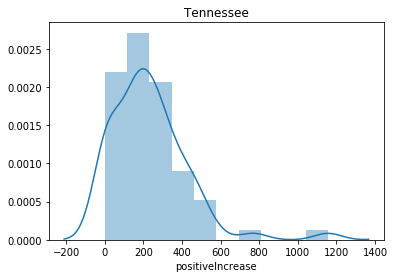

In [58]:
plt.title('Tennessee')
sns.distplot(daily[daily['state'] == 'TN']['positiveIncrease'],
             bins = 10,
             kde = True)

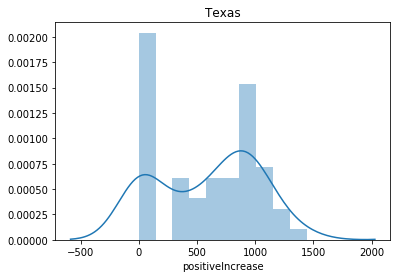

In [60]:
plt.title('Texas')
sns.distplot(daily[daily['state'] == 'TX']['positiveIncrease'],
             bins = 10,
             kde = True)

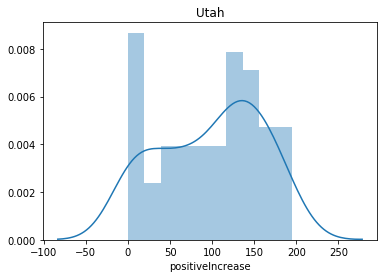

In [62]:
plt.title('Utah')
sns.distplot(daily[daily['state'] == 'UT']['positiveIncrease'],
             bins = 10,
             kde = True)

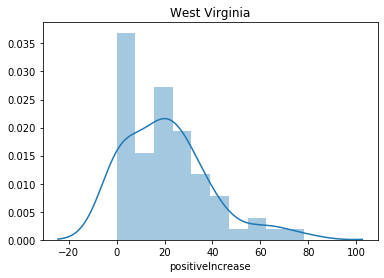

In [99]:
plt.title('West Virginia')
sns.distplot(daily[daily['state'] == 'WV']['positiveIncrease'],
             bins = 10,
             kde = True)

In [103]:
alabama = daily.loc[daily['state'] == 'AL']

In [113]:
alabama['positiveIncrease'].sort_index()

1       232.0
57      210.0
113     346.0
169     323.0
225     317.0
        ...  
3346      0.0
3397      0.0
3447      0.0
3497      0.0
3547      0.0
Name: positiveIncrease, Length: 65, dtype: float64

In [122]:
alabama.shape

(65, 27)

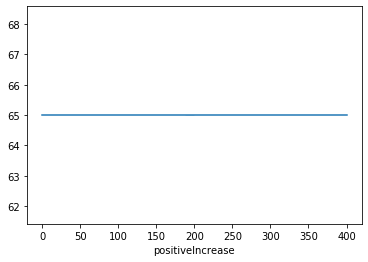

In [130]:
sns.lineplot(x='positiveIncrease', y= days, data=alabama)

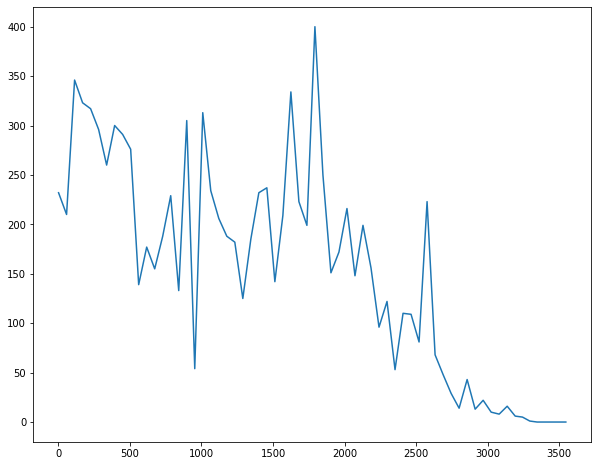

In [132]:
alabama['positiveIncrease'].plot(figsize=(10,8), kind='line')

In [79]:
daily.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [90]:
state.columns

Index(['state', 'easing_soc_dist', 'stay_home_ord', 'traveler_quarant',
       'business_clos', 'gathering_ban', 'school_clos', 'rest_lims',
       'primaries', 'emergency_date', 'emergency', 'order_date',
       'shelter_in_place', 'state_abbr'],
      dtype='object')

In [ ]:
state_daily_inc = state_daily_inc[['state', 'deathIncrease','hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']]

In [ ]:
daily_inc.loc[daily_inc['state'] == 'WV']

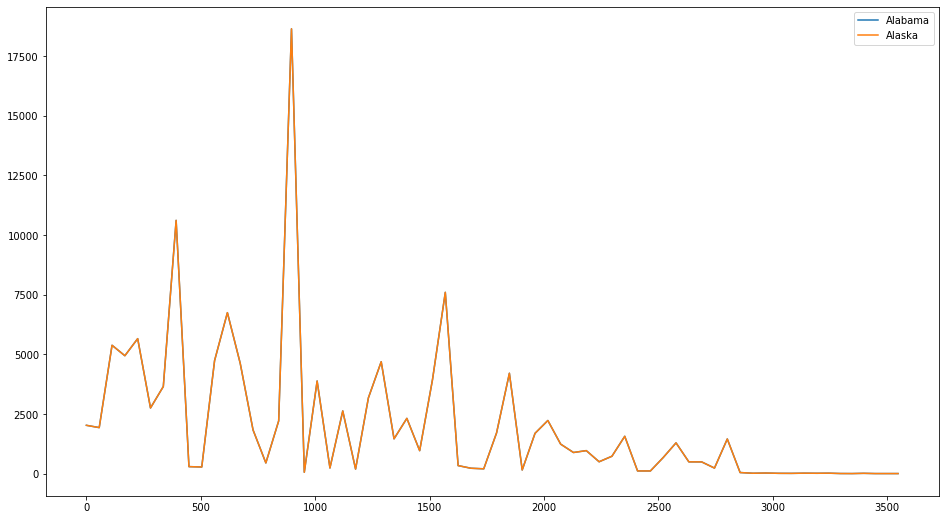

In [151]:
plt.figure(figsize=(16, 9))

plt.plot(daily[daily['state'] == 'AL']['totalTestResultsIncrease'],
         #daily_inc[daily_inc['state'] == 'VA']['negativeIncrease'],
         label = 'Alabama')

plt.plot(daily[daily['state'] == 'AL']['totalTestResultsIncrease'],
         #daily[daily['state'] == 'DC']['negativeIncrease'],
         label = 'Alaska')

plt.legend(loc = 'upper right');

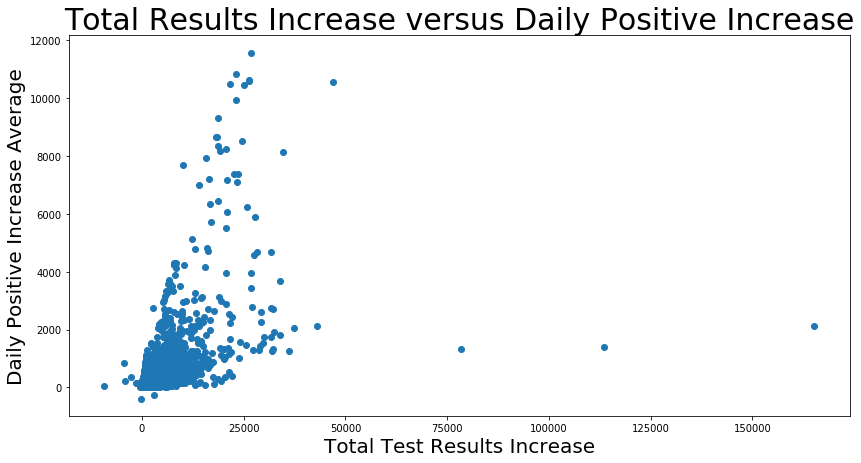

In [89]:
plt.figure(figsize=(14, 7))

plt.scatter(daily['totalTestResultsIncrease'],
            daily['positiveIncrease']);

plt.title("Total Results Increase versus Daily Positive Increase", fontsize = 30)
plt.ylabel("Daily Positive Increase Average", fontsize = 20)
plt.xlabel("Total Test Results Increase", fontsize = 20);

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

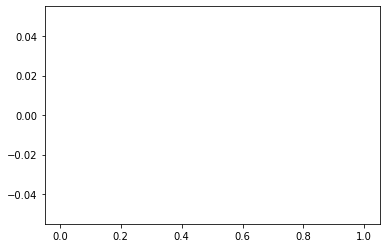

In [143]:
plt.hist(daily[daily['positiveIncrease'] == 'AL'])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24b23210>],
      dtype=object)

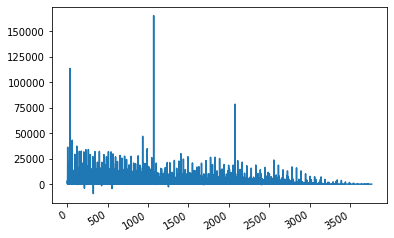

In [152]:
daily['totalTestResultsIncrease'].plot.line(subplots=True)


In [166]:
daily_inc = daily[['state', 'deathIncrease','hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']]
daily_inc.head()

,state,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,AK,0.0,0.0,1314.0,2.0,1316.0
1,AL,8.0,16.0,1791.0,232.0,2023.0
2,AR,6.0,9.0,3215.0,287.0,3502.0
3,AS,0.0,0.0,22.0,0.0,22.0
4,AZ,6.0,9.0,12241.0,261.0,12502.0


In [167]:
daily['positiveIncrease']

0         2.0
1       232.0
2       287.0
3         0.0
4       261.0
        ...  
3763      0.0
3764      0.0
3765      0.0
3766      0.0
3767      0.0
Name: positiveIncrease, Length: 3713, dtype: float64

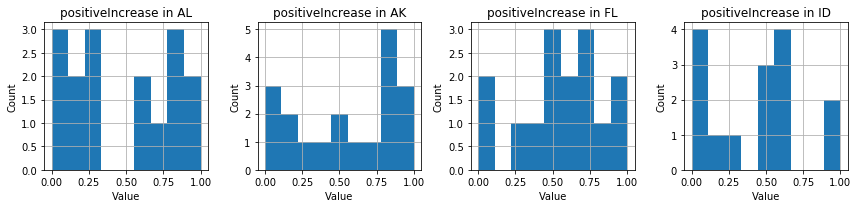

In [172]:
# Create some dummy data
# code assistance form StackOverflow

data = pd.DataFrame()
states = ["AL","AK","FL","ID"]

data['state']=np.hstack([[state]*np.random.randint(10,20) for state in states])
data['positiveIncrease']=np.random.random(data.shape[0])

# Now create a figure
fig, axes = plt.subplots(1,4, figsize=(12,3))

# Now plot each zone on a particular axis
for i, state in enumerate(states):
    data.loc[data.state == state].hist(column='positiveIncrease',
                                   bins=np.linspace(0,1,10),
                                   ax=axes[i],
                                   sharey=True)
    axes[i].set_title('positiveIncrease in {0}'.format(state))
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

fig.tight_layout()
fig.show()


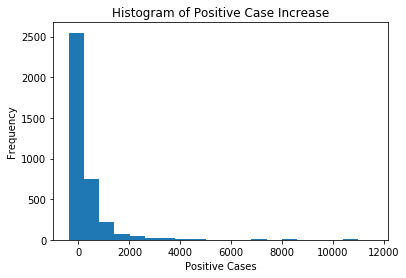

In [174]:
daily.positiveIncrease.plot(
    kind='hist', 
    bins=20, 
    title='Histogram of Positive Case Increase'
);

plt.xlabel('Positive Cases');
plt.ylabel('Frequency');
plt.savefig('pos_increase.png');    # Save to file!


In [175]:
daily.shape

(3713, 27)